In [8]:
import torch
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Iris-Datensatz laden
iris = load_iris()
X, y = iris.data, iris.target

# Merkmale normalisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-Hot-Kodierung der Zielvariablen
num_classes = np.unique(y).size
y = np.eye(num_classes)[y, :]

# Datensatz in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = \
    (train_test_split(X_scaled, y, test_size=0.2, random_state=42))

# Trainings- und Testdatensätze in PyTorch-Tensoren umwandeln
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [10]:
class ClassificationNet(nn.Module):
    def __init__(self):
        # super(ClassificationNet, self)返回ClassificationNet类的父类（即 nn.Module）的一个实例
        super(ClassificationNet, self).__init__()
        self.hidden1 = nn.Linear(4, 5)  
        self.hidden2 = nn.Linear(5, 10)
        self.predict = nn.Linear(10, 3)  

    def forward(self, x):
        # die 1. versteckte Schicht
        x = self.hidden1(x)
        x = torch.relu(x)
        # die 2. versteckte Schicht
        x = self.hidden2(x)
        # Ausgabeschicht
        x = self.predict(x)
        x = torch.softmax(x, dim = 1)
        return x

model = ClassificationNet()

In [11]:
# Definieren der Verlustfunktion: MSE
loss_func = torch.nn.MSELoss()
# Definieren des Optimierers: SGD mit Lernrate 0.1
optimizer = torch.optim.SGD(model.parameters(),lr = 0.1)

In [12]:
model.train()
epoch_number = 500
train_losses = []

for epoch in range(epoch_number):
    
    output = model(X_train)           # Schritt 1. Vorhersagewert berechnen
    loss = loss_func(output, y_train) # Schritt 2. Verlust berechnen
    loss.backward()                   # Schritt 3. Gradienten berechnen mit Rückwärtspropagation
    optimizer.step()                  # Schritt 4. Parameter aktualisieren
    optimizer.zero_grad()             # Schritt 5. Gradienten zurücksetzen
    
    # Verlust merken
    train_losses.append(loss.item()) 
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 10, Loss: 0.23086115717887878
Epoch 20, Loss: 0.22492006421089172
Epoch 30, Loss: 0.2197309285402298
Epoch 40, Loss: 0.21479211747646332
Epoch 50, Loss: 0.20988373458385468
Epoch 60, Loss: 0.20487037301063538
Epoch 70, Loss: 0.19961582124233246
Epoch 80, Loss: 0.19393369555473328
Epoch 90, Loss: 0.18774884939193726
Epoch 100, Loss: 0.18106359243392944
Epoch 110, Loss: 0.1739065945148468
Epoch 120, Loss: 0.16634218394756317
Epoch 130, Loss: 0.15851862728595734
Epoch 140, Loss: 0.15062887966632843
Epoch 150, Loss: 0.14298374950885773
Epoch 160, Loss: 0.1356993317604065
Epoch 170, Loss: 0.12884069979190826
Epoch 180, Loss: 0.12243664264678955
Epoch 190, Loss: 0.11646457016468048
Epoch 200, Loss: 0.1109224408864975
Epoch 210, Loss: 0.10577642917633057
Epoch 220, Loss: 0.1009807363152504
Epoch 230, Loss: 0.09650533646345139
Epoch 240, Loss: 0.0923222228884697
Epoch 250, Loss: 0.08839720487594604
Epoch 260, Loss: 0.08471383899450302
Epoch 270, Loss: 0.08124423772096634
Epoch 280, Loss:

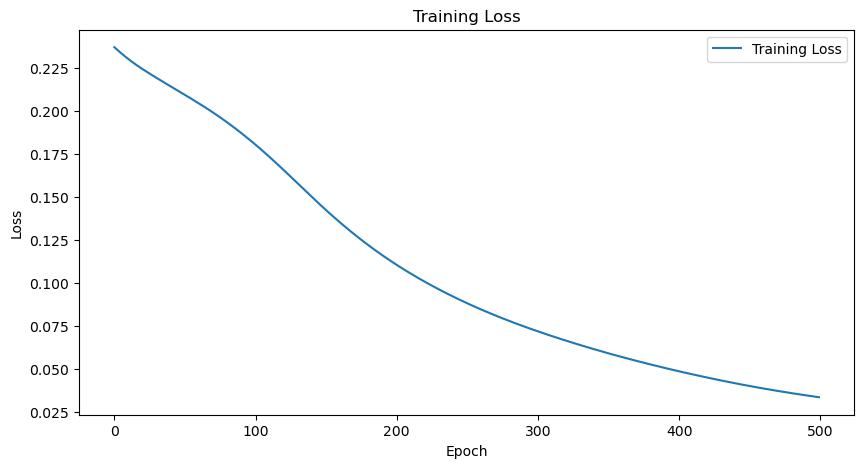

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [14]:
model.eval()

# Die Ausgaben sind die Wahrscheinlichkeiten der 3 Klassen
output = model(X_test)
# Vorhersage ist die Klasse mit der größten Wahrscheinlichkeit
pred = output.argmax(dim=1, keepdim=True)
# y_test_pred repräsentiert die richtige Klasse
y_test_pred = y_test.argmax(dim=1, keepdim=True)
# die Vorhersagen mit den richtigen Labels vergleichen
correct_number = pred.eq(y_test_pred).sum().item()

accuracy = 100. * correct_number / len(X_test)
print(f'Test Accuracy: {accuracy}%')

Test Accuracy: 100.0%
